# 確率変数

## 用語

### 確率変数と確率分布
- 乱数 random number
- 確率変数 random variable
- 離散型 discerete type
- 確率分布 probability distribution
- 離散型の確率分布 p, d, of discrete type
- 連続型 continuous type
- 確率密度関数 probability density function
  - 指数分布 exponential distribution
  - 一様分布 uniform distribution
    - 一様乱数 uniform random number
- 累積分布関数 cumulative distribution function
- モード mode
- 中央値 median

### 確率変数の期待値と分散
- 期待値 expectation
- 分散 variance
- 標準偏差 standard deviation

### モーメントとモーメント母関数
- 歪度（歪度係数） skewness
- 尖度 kurtosis
  - 超過係数 coefficient of excess
- モーメント（積率） moment
- モーメント母関数 moment generating function

### チェビシェフの不等式
- チェビシェフの不等式 Chebyshev's inequality

### 確率変数の変換
- 指数乱数 exponential random number
- 対数正規分布 log-normal distribution

In [ ]:
using Distributions
using PyPlot

---
# ノート

## 確率変数と確率分布
確率変数：　各値に対してそれぞれ確率が与えられている変数  
さいころの場合、出る目の値$X$が確率変数であり、確率は$P(X=1)=1/6$と表す。

確率変数$X$には離散型・連続型がある。

### 離散型
二項分布、ポアソン分布、超幾何分布など
$$f(x_k)\geq0 （k=1,2, \ldots） かつ \sum_{k=1}^\infty f(x_k)=1$$  

### 連続型
$$\mbox{すべてのxに対し}\ f(x_k)\geq0 \mbox{かつ} \int_{-\infty}^\infty f(x_k) dx=1$$

連続型において$f(x)$は確率密度関数という。連続型の確率分布は面積が確率を表すため、一点の確率は0となる。 e.g.) $\int_k^k f(x) dx=0$  
連続型確率分布の扱いの例として指数分布 $f(x)=\lambda e^{-\lambda x}(\lambda\gt0)$ を考える。  
$$ \int_{-\infty}^\infty f(x_k) dx = \int_0^\infty \lambda e^{-\lambda x} dx=1$$
$$ P(a\geq X\geq b)= \int_b^a \lambda e^{-\lambda x} dx=e^{-\lambda a}-e^{-\lambda b}$$

### 累積分布関数
確率変数$X$に対して実数$x$以下の確率を$X$の累積分布関数と呼ぶ。
$$F(x)=P(X\geq x)$$
連続型の場合$F(x)$は密度関数 $f$の定積分 $F(x)=\int_{-\infty}^{x}f(u)\ du$ となる。この場合$F(x)$を微分することで密度関数 $f(x)$が復元できる。
離散型の場合は$-\infty$から$x$まで積み上げた、$F(x)=\sum_{u\geq x}f(u)$となる。

累積分布関数は次の3つの性質をもつ
1. 広義単調増加 
  - $x_1\lt x_2$ならば$F(x_1)\leq F(x_2)$
2. 範囲
  - $x \rightarrow \infty$のとき$F(x) \rightarrow 1$
  - $x \rightarrow -\infty$のとき$F(x) \rightarrow 0$
3. 右連続
  - 各点 $x$で$\epsilon \downarrow 0$のとき$F(x+\epsilon)\rightarrow F(x)$

## 確率変数の期待値と分散
確率変数Xの関数$\phi(X)$について期待値$E(X)$の定義は以下の通りである。一般には$\phi(x)=x$である。

$$E(\phi(X))=\sum_x \phi(x)\ f(x) \ (\mbox{離散型})$$ 
$$E(\phi(X))=\int_{-\infty}^{\infty}\phi(x)\ f(x)\ dx \ (\mbox{連続型})$$ 

期待値は1つの定数であり、無限和・積分であるために存在しないこともある。期待値は平均であり、重心である。

In [1]:
# 指数関数の期待値は 1/lambdaだが、juliaのExponential関数はlambdaの逆数を入力とする
lambda = 5
mean(Exponential(1/lambda))

0.2

期待値の演算$E$について重要な性質は以下の通り
1. $E(c)=c$
2. $E(X+c)=E(X)+c$
3. $E(cX)=cE(X)$
4. $E(X+Y)=E(X)+E(Y)$ （期待値の加法性）

さいきころを2回振ったときの平均値の値を確率変数とする。1回でも2回でも平均値は同じだが、ばらつきが異なる。（一様分布から正規分布に近づく）
そのばらつきを表す$X$の分散を$V(X)$とする。$\mu = E(X)$とすると$V(X)=E\{(X-\mu)^2\}$である。

$$E(\phi(X))=\sum_x (x-\mu)^2 \ f(x) \ (\mbox{離散型})$$ 
$$E(\phi(X))=\int_{-\infty}^{\infty}(x-\mu)^2\ f(x)\ dx \ (\mbox{連続型})$$ 

上記が分散の定義だが、計算自体はもっと簡単にできる。
$$V(X) = E(X^2)-(E(X))^2$$

分散の重要な性質は次の通り。
1. $V(c)=0$
2. $V(X+c)=V(X)$
3. $V(cX)=c^2V(X)$

分散の平方根を$D(X)=\sqrt{V(X)}$とおき、$X$の標準偏差という。標準偏差は元の確率変数と同じ次元を持つ。

標準化について、期待値と分散を下記のように調整する。
$$Z=\{X-E(X)\}/\sqrt{V(X)}$$
期待値の性質3と分散の性質3によりZについて下記が言える。この変換を確率変数の**標準化**といい、$Z$を**標準化変数**という。
$$E(Z)=0, V(Z)=1$$

## モーメントとモーメント母関数
### 歪度
期待値$E(X)$と分散$V(X)$で確率分布の様子はある程度わかるがこれだけでは形が一通りに決まらない。  
非対称性の指標として方向・程度を表す下記の値を用いる。**歪度**と呼ぶ。
$$\alpha_3 = E(X-\mu)^3/\sigma^3$$
$\alpha_3>0$なら右の裾が長く、$\alpha_3<0$なら左の裾が長い。

歪度は$\mu$を中心として$X$が正負どちら側に優勢かどうかをみている。  
三次関数$y=x^3$は符号を保ったまま値を大きくするためより顕著にわかる。  
また、標準化のために$\sigma^3$で割る。

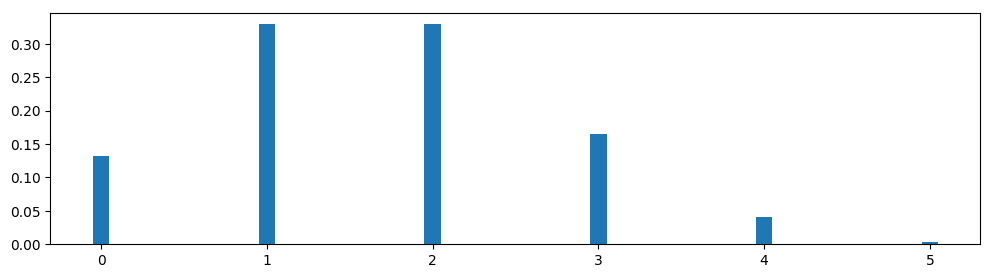

(PyObject <matplotlib.patches.Rectangle object at 0x1263073c8>, PyObject <matplotlib.patches.Rectangle object at 0x126307b38>, PyObject <matplotlib.patches.Rectangle object at 0x12630f400>, PyObject <matplotlib.patches.Rectangle object at 0x12630fcf8>, PyObject <matplotlib.patches.Rectangle object at 0x1263165f8>, PyObject <matplotlib.patches.Rectangle object at 0x126316eb8>)

In [4]:
# 右に裾の長い例
x, bin = linspace(0, 5, 6), Binomial(5, 1/3)
figure(figsize=(12, 3))
bar(x, pdf.(bin, x), width=0.1)

$E(X-\mu)^3$は下記のように求められる。

\begin{align}
E(X-\mu)^3 &= E(\,X^3) - 3\mu E(\,X^2) + 3 \mu^2 E(X) - \mu^3 \\
                   &= E(\,X^3) -3 \mu E(\,X^2) + 2 \mu^3
\end{align}                 


In [28]:
# 上式を使ってα3を求める
μ=mean(bin)
EX2 = sum(x.^2 .* pdf.(bin, x))
EX3 = sum(x.^3 .* pdf.(bin, x))
(EX3 - 3 * μ * EX2 + 2*μ^3)/(std(bin)^3)

0.3162277660168363

In [8]:
# Distributions.jlの関数を使って求める
skewness(bin)

0.316227766016838

### 尖度
確率分布の中心付近の尖り具合を示す指標として四乗の期待値を用いる。
$$\alpha_4=E(X-\mu)^4/\sigma^4$$
正規分布の値、$\alpha_4=3$と比較して$\alpha_4-3$を**尖度**という。  
$\alpha_4-3>0$なら正規分布より尖っており、$\alpha_4-3<0$なら正規分布より丸いといったように扱う。

四次関数$y=x^4$は$x=0$より遠くなればなるほど値が激しく増加する。  
$\mu$を中心としたとき、中心の影響度合いと周辺部の影響度合いをみることができる。  
周辺部に影響が大きいとき$E(X-\mu)$の値は大きくなる。

In [29]:
kurtosis(bin)

-0.3000000000000001

### モーメント
期待値、歪度、尖度を考えると確率分布の形は$E(X-\mu)^r$で決まることがわかる。  
$\mu_r=E(X^r)$を$X$の原点のまわりの$r$次の**モーメント（積率）**という。  
$\mu'_r=E(X-\mu)^r$を$X$の原点のまわりの$r$次の**モーメント（積率）**という。  
$\alpha_r=E\{(X-\mu)/\sigma\}^r$を$X$の$r$次の**標準化モーメント**という。

期待値、分散は基礎的なモーメントであり、 $\mu_1=E(X),\;\mu'_2=V(X)$である。

期待値、分散、歪度、尖度を指定するとあてはまる確率分布の候補が制限されていく。  
そのようにしてすべての次数のモーメントを指定することで確率分布を一意に決定することができる。  
すべての次数のモーメントを生成する以下の関数を**モーメント母関数**と呼ぶ。
$$M_x(t)=E(e^{\,tX})$$

実際の計算は離散型であれば無限和、連続型であれば無限積分を行う。ただし、無限和・積分が存在しないことも有る。
ネイピア数の展開式$e^x=1+x+x^2/2!+x^3/3! + \dots$より$x=tX$を代入して両辺期待値を取ると

\begin{align}
M_x(t) &= 1+tE(X)+t^2E(\,X^2)/2!+t^3E(\,X^3)/3!+\dots \\
         &= 1+\mu_1t+(\mu_2/2!)\,t^2+(\mu_3/3!)\,t^3 + \dots
\end{align}                 
となるので次数の数だけ微分して$t=0$とすれば$\mu_r$が得られる。よって$M_x^{(r)}(0)=\mu_r$である。

モーメント母関数$M_x(t)$がすべての次数のモーメントを生成するため、確率分布を決定するものとなる。  
事実上モーメント母関数は確率分布そのものである。（メリットは6章7章で）

## チェビシェフの不等式
分布の平均と分散が与えられ、確率の見当をつける際に次に示すチェビシェフの不等式が役に立つときがある。  
次の不等式は**いかなる確率変数Xにたいしても成立する**。ただし、$\mu=E(X),\;\sigma^2=V(X)$である。
$$P(|\,X-\mu\,|\geq k\sigma)\leq1/k^2$$

今までの例で扱ったような$f(x)$の式が具体的にわかっていなくとも、期待値と分散がわかっていれば確率の値を不等式の形で示すことができる。これがチェビシェフの不等式のメリットである。

例）　$E(X)=1, V(X)=1/3$であるとき、$0\geq X \geq 2$となる確率はいくらか。
$$P(0\geq X \geq 2) = P(|X-\mu |)\geq \sqrt{3}\sigma) \leq 1-(1-\sqrt{3})^2=2/3$$
よって求める確率は2/3以上であることがわかる。

## 確率変数の変換

---
# 練習問題

## 一様分布

## 期待値の実地例

## 聖ペテルスブルグの逆説


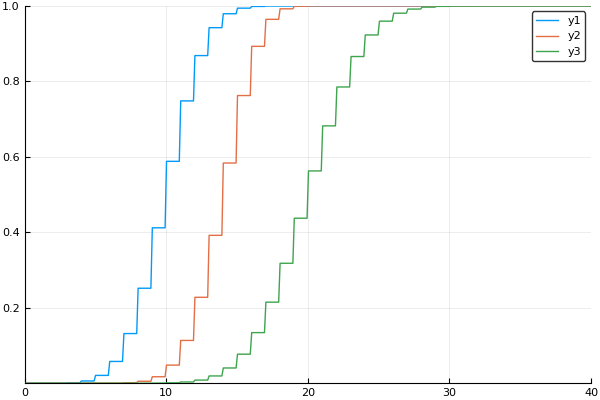

In [13]:
x = linspace(0, 40, 400)
A, B, C = Binomial(20, .5), Binomial(20, .7), Binomial(40, .5)
y = [cdf.(A, x) cdf.(B, x) cdf.(C, x)]
plot(x, y)

## 最小平均二乗

In [14]:
x.shape
[0 1 2 3 4 5].shape

LoadError: [91mtype StepRangeLen has no field shape[39m

## 正$n$面体の期待値と分散

In [26]:
linspace(0, 5, 6)

0.0:1.0:5.0

## 一様分布の平方変換

## 正規分布の平方変換

## 累積分布関数における等号